# 第5章 决策树

- ID3（基于信息增益）
- C4.5（基于信息增益比）
- CART 二叉决策树（gini指数）

#### entropy：$H(x) = -\sum_{i=1}^{n}p_i\log{p_i}$

#### conditional entropy: $H(X|Y)=\sum{P(X|Y)}\log{P(X|Y)}$

#### information gain : $g(D, A)=H(D)-H(D|A)$

#### information gain ratio: $g_R(D, A) = \frac{g(D,A)}{H_{A}(D)}$

#### gini index:$Gini(D)=\sum_{k=1}^{K}p_k\log{p_k}=1-\sum_{k=1}^{K}p_k^2$

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from collections import Counter
import math
from math import log

import pprint

### 例 5.1

In [0]:
def create_data():
    datasets = [['青年', '否', '否', '一般', '否'],
               ['青年', '否', '否', '好', '否'],
               ['青年', '是', '否', '好', '是'],
               ['青年', '是', '是', '一般', '是'],
               ['青年', '否', '否', '一般', '否'],
               ['中年', '否', '否', '一般', '否'],
               ['中年', '否', '否', '好', '否'],
               ['中年', '是', '是', '好', '是'],
               ['中年', '否', '是', '非常好', '是'],
               ['中年', '否', '是', '非常好', '是'],
               ['老年', '否', '是', '非常好', '是'],
               ['老年', '否', '是', '好', '是'],
               ['老年', '是', '否', '好', '是'],
               ['老年', '是', '否', '非常好', '是'],
               ['老年', '否', '否', '一般', '否'],
               ]
    labels = [u'年龄', u'有工作', u'有自己的房子', u'信贷情况', u'类别']
    # 返回数据集和每个维度的名称
    return datasets, labels

In [68]:
datasets, labels = create_data()
train_data = pd.DataFrame(datasets, columns=labels)
train_data

,年龄,有工作,有自己的房子,信贷情况,类别
0,青年,否,否,一般,否
1,青年,否,否,好,否
2,青年,是,否,好,是
3,青年,是,是,一般,是
4,青年,否,否,一般,否
5,中年,否,否,一般,否
6,中年,否,否,好,否
7,中年,是,是,好,是
8,中年,否,是,非常好,是
9,中年,否,是,非常好,是


In [53]:
datasets

[['青年', '否', '否', '一般', '否'],
 ['青年', '否', '否', '好', '否'],
 ['青年', '是', '否', '好', '是'],
 ['青年', '是', '是', '一般', '是'],
 ['青年', '否', '否', '一般', '否'],
 ['中年', '否', '否', '一般', '否'],
 ['中年', '否', '否', '好', '否'],
 ['中年', '是', '是', '好', '是'],
 ['中年', '否', '是', '非常好', '是'],
 ['中年', '否', '是', '非常好', '是'],
 ['老年', '否', '是', '非常好', '是'],
 ['老年', '否', '是', '好', '是'],
 ['老年', '是', '否', '好', '是'],
 ['老年', '是', '否', '非常好', '是'],
 ['老年', '否', '否', '一般', '否']]

In [54]:
labels

['年龄', '有工作', '有自己的房子', '信贷情况', '类别']

In [0]:
d = {'青年':1, '中年':2, '老年':3, '一般':1, '好':2, '非常好':3, '是':0, '否':1}
data = []
for i in range(15):
    tmp = []
    t = datasets[i]
    for tt in t:
        tmp.append(d[tt])
    data.append(tmp)

In [56]:
data = np.array(data);data

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 2, 1],
       [1, 0, 1, 2, 0],
       [1, 0, 0, 1, 0],
       [1, 1, 1, 1, 1],
       [2, 1, 1, 1, 1],
       [2, 1, 1, 2, 1],
       [2, 0, 0, 2, 0],
       [2, 1, 0, 3, 0],
       [2, 1, 0, 3, 0],
       [3, 1, 0, 3, 0],
       [3, 1, 0, 2, 0],
       [3, 0, 1, 2, 0],
       [3, 0, 1, 3, 0],
       [3, 1, 1, 1, 1]])

In [57]:
data.shape

(15, 5)

In [0]:
X, y = data[:,:-1], data[:, -1]

In [0]:
# 熵
def entropy(y):
    N = len(y)
    count = []
    for value in set(y):
        count.append(len(y[y == value]))
    count = np.array(count)
    entro = -np.sum((count / N) * (np.log2(count / N)))
    return entro

In [10]:
entropy(y)

0.9709505944546686

In [0]:
# 条件熵
def cond_entropy(X, y, cond):
    N = len(y)
    cond_X = X[:, cond]
    tmp_entro = []
    for val in set(cond_X):
        tmp_y = y[np.where(cond_X == val)]
        tmp_entro.append(len(tmp_y)/N * entropy(tmp_y))
    cond_entro = sum(tmp_entro)
    return cond_entro

In [12]:
cond_entropy(X, y, 0)

0.8879430945988998

In [0]:
# 信息增益
def info_gain(X, y, cond):
    return entropy(y) - cond_entropy(X, y, cond)

In [0]:
# 信息增益比
def info_gain_ratio(X, y, cond):
    return (entropy(y) - cond_entropy(X, y, cond))/cond_entropy(X, y, cond)

In [15]:
# A1, A2, A3, A4 =》年龄 工作 房子 信贷
# 信息增益

gain_a1 = info_gain(X, y, 0);gain_a1

0.08300749985576883

In [0]:
gain_a2 = info_gain(X, y, 1);gain_a2

0.32365019815155627

In [0]:
gain_a3 = info_gain(X, y, 2);gain_a3

0.4199730940219749

In [0]:
gain_a4 = info_gain(X, y, 3);gain_a4

0.36298956253708536

In [0]:
def best_split(X,y, method='info_gain'):
    """根据method指定的方法使用信息增益或信息增益比来计算各个维度的最大信息增益（比），返回特征的axis"""
    _, M = X.shape
    info_gains = []
    if method == 'info_gain':
        split = info_gain
    elif method == 'info_gain_ratio':
        split = info_gain_ratio
    else:
        print('No such method')
        return
    for i in range(M):
        tmp_gain = split(X, y, i)
        info_gains.append(tmp_gain)
    best_feature = np.argmax(info_gains)
    
    return best_feature

In [27]:
best_split(X,y)

2

In [0]:
def majorityCnt(y):
    """当特征使用完时，返回类别数最多的类别"""
    unique, counts = np.unique(y, return_counts=True)
    max_idx = np.argmax(counts)
    return unique[max_idx]

In [20]:
majorityCnt(y)

0

#### ID3, C4.5算法

例5.3

In [0]:
class DecisionTreeClassifer:
    """
    决策树生成算法，
    method指定ID3或C4.5,两方法唯一不同在于特征选择方法不同
    info_gain:       信息增益即ID3
    info_gain_ratio: 信息增益比即C4.5
    
    
    """
    def __init__(self, threshold, method='info_gain'):
        self.threshold = threshold
        self.method = method
        
    def fit(self, X, y, labels):
        labels = labels.copy()
        M, N = X.shape
        if len(np.unique(y)) == 1:
            return y[0]
        
        if N == 1:
            return majorityCnt(y)
        
        bestSplit = best_split(X,y, method=self.method)
        bestFeaLable = labels[bestSplit]
        Tree = {bestFeaLable: {}}
        del (labels[bestSplit])
        
        feaVals = np.unique(X[:, bestSplit])
        for val in feaVals:
            idx = np.where(X[:, bestSplit] == val)
            sub_X = X[idx]
            sub_y = y[idx]
            sub_labels = labels
            Tree[bestFeaLable][val] = self.fit(sub_X, sub_y, sub_labels)
            
        return Tree

In [69]:
My_Tree = DecisionTreeClassifer(threshold=0.1)
My_Tree.fit(X, y, labels)

{'有自己的房子': {0: 0, 1: {'有工作': {0: 0, 1: 1}}}}

#### CART树

In [0]:
class CART:
    """CART树"""
    def __init__(self, ):
        "to be continue"

#### 决策树的剪枝

In [0]:
"to be continue"

---

## sklearn.tree.DecisionTreeClassifier

### criterion : string, optional (default=”gini”)
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

In [0]:
# data
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0, 1, -1]])
    # print(data)
    return data[:,:2], data[:,-1]

X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
import graphviz

In [0]:
clf = DecisionTreeClassifier()
clf.fit(data[:,:-1], data[:,-1])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
clf.predict(np.array([1, 1, 0, 1]).reshape(1,-1)) # A

array([0])

In [0]:
clf.predict(np.array([2, 0, 1, 2]).reshape(1,-1)) # B

array([0])

In [0]:
clf.predict(np.array([2, 1, 0, 1]).reshape(1,-1)) # C

array([0])

In [0]:
tree_pic = export_graphviz(clf, out_file="mytree.pdf")
with open('mytree.pdf') as f:
    dot_graph = f.read()

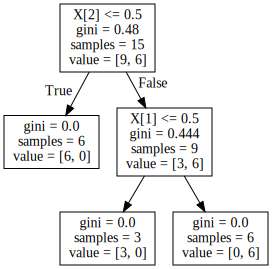

In [0]:
graphviz.Source(dot_graph)